<a href="https://colab.research.google.com/github/rajayourfriend/EIP_Assignments/blob/master/EIP4_Assignment2_withoutbias_04_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

!sudo apt-get install lshw
!lshw -numeric -C display

Using TensorFlow backend.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpci3 pciutils usbutils
The following NEW packages will be installed:
  libpci3 lshw pciutils usbutils
0 upgraded, 4 newly installed, 0 to remove and 32 not upgraded.
Need to get 721 kB of archives.
After this operation, 2,870 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpci3 amd64 1:3.5.2-1ubuntu1.1 [24.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 lshw amd64 02.18-0.1ubuntu6.18.04.1 [231 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 pciutils amd64 1:3.5.2-1ubuntu1.1 [257 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 usbutils amd64 1:007-4build1 [208 kB]
Fetched 721 kB in

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


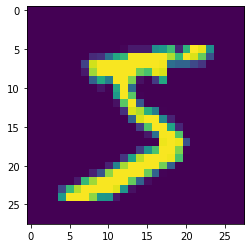

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

#Use GAP, BN, LRscheduler, dropout, callbacks
model.add(Convolution2D(10, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), use_bias=False, name="FirstConv"))#26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, kernel_size=(3, 3), activation='relu', use_bias=False, name="SecondConv"))#24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, kernel_size=(3, 3), activation='relu', use_bias=False, name="ThirdConv"))#22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(2, 2, name="MP"))#11
model.add(Convolution2D(30, 1, activation='relu', use_bias=False, name="PointwiseConv"))#11

model.add(Convolution2D(10, kernel_size=(3, 3), activation='relu', use_bias=False, name="FourthConv"))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(15, kernel_size=(3, 3), activation='relu', use_bias=False, name="FifthConv"))#7
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Convolution2D(15, kernel_size=(3, 3), activation='relu', use_bias=False, name="SixthConv"))#5
#model.add(Dropout(0.01))

model.add(Convolution2D(10, kernel_size=(5, 5), use_bias=False, name="SeventhConv"))
model.add(BatchNormalization())

#model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstConv (Conv2D)           (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
SecondConv (Conv2D)          (None, 24, 24, 10)        900       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 10)        0         
_________________________________________________________________
ThirdConv (Conv2D)           (None, 22, 22, 10)       

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
snapshot_filepath = "/opt/saved_weight_file.hdf5"
cp_callback = keras.callbacks.ModelCheckpoint(snapshot_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
CALLBACKS = [cp_callback, lr_scheduler]

model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), callbacks = CALLBACKS)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.




Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 39s 643us/step - loss: 0.4536 - acc: 0.9077 - val_loss: 0.1073 - val_acc: 0.9826

Epoch 00001: val_acc improved from -inf to 0.98260, saving model to /opt/saved_weight_file.hdf5
Epoch 2/20
60000/60000 [==============================] - 34s 567us/step - loss: 0.1580 - acc: 0.9674 - val_loss: 0.0621 - val_acc: 0.9871

Epoch 00002: val_acc improved from 0.98260 to 0.98710, saving model to /opt/saved_weight_file.hdf5
Epoch 3/20
60000/60000 [==============================] - 34s 559us/step - loss: 0.1098 - acc: 0.9748 - val_loss: 0.0419 - val_acc: 0.9904

Epoch 00003: val_acc improved from 0.98710 to 0.99040, saving model to /opt/saved_weight_file.hdf5
Epoch 4/20
60000/60000 [==============================] - 34s 560us/step - loss: 0.0837 - acc: 0.9804 - val_loss: 0.0341 - val_acc: 0.9919

Epoch 00004: val_acc improved from 0.99040 to 0.99190, saving model to /opt/saved_weight_file.

In [0]:
model.load_weights(snapshot_filepath)
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.01727237341988366, 0.9949]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.32671914e-06 7.47082549e-06 1.76606216e-06 6.92713820e-06
  4.13399766e-06 1.92622178e-06 4.54608335e-06 9.99966860e-01
  2.19799222e-06 2.76776927e-06]
 [6.36875893e-06 9.61160026e-07 9.99958634e-01 7.49644528e-07
  5.38154836e-06 4.86724048e-07 3.30267903e-06 1.87410787e-05
  1.04426306e-06 4.38930601e-06]
 [6.63214792e-07 9.99905467e-01 4.36005303e-06 4.42527335e-06
  7.00355213e-06 3.33965654e-05 2.29132092e-05 1.22042820e-05
  1.73643105e-06 7.69213875e-06]
 [9.99976397e-01 3.14280260e-06 1.95178544e-07 1.28655729e-05
  2.66277198e-07 5.20517290e-07 2.06329310e-06 2.32845127e-06
  1.56339740e-06 6.42114060e-07]
 [2.23354718e-07 2.52333466e-05 1.40617942e-06 1.61790467e-05
  9.99923706e-01 2.37726636e-06 2.58695172e-06 1.64303253e-06
  6.69804786e-06 1.99985843e-05]
 [1.67160738e-06 9.99959469e-01 2.71920044e-06 1.84367252e-06
  2.47834055e-06 5.19945661e-06 1.06471662e-05 1.21724179e-05
  3.74556919e-07 3.48461663e-06]
 [1.22635541e-07 1.02983839e-04 1.31904699e-05 2.85966763e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

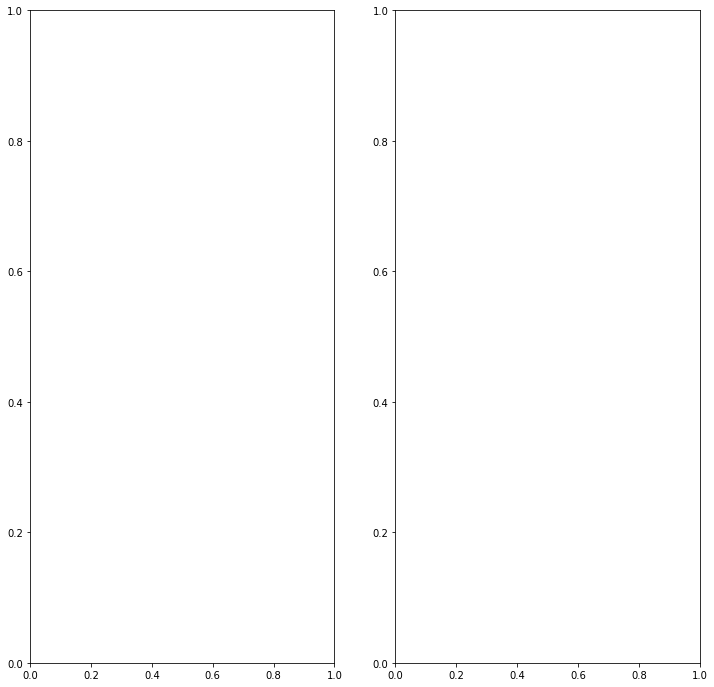

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name = 'SeventhConv')